*** Please read these instructions before proceeding...
---> change the location of chromedriver ...according to your chromedriver's location...in __init__...
---> INTERNET SPEED SHOULD BE 1 MBPS FOR BETTER EXECUTION
---> if any function fails once..re-execute it...it will work fine...

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from datetime import date
import time
import matplotlib.pyplot as plt
import csv

In [2]:
class InstaBot():
    def __init__(self, email, password):
        options = Options()
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        self.browser = webdriver.Chrome(executable_path = '/home/uditanshu/Documents/chromedriver',options = options)
        self.wait = WebDriverWait(self.browser,10)
        self.email = email
        self.password = password
        
    def signIn(self):
        self.browser.get('https://www.instagram.com/accounts/login/')
        user = self.wait.until(EC.presence_of_all_elements_located((By.XPATH,"//label")))
        user[0].send_keys(self.email)
        user[1].send_keys(self.password)
        time.sleep(2)
        submit = self.browser.find_element_by_xpath("//button[@type='submit']")
        submit.submit()
        key = WebDriverWait(self.browser,20).until(EC.presence_of_element_located((By.XPATH,"//div[@role='dialog']//div[@class='piCib']/div[3]/button[2]")))
        key.click()
        self.browser.maximize_window()
    
    def insta_handles(self,name):
        first_10 = []
        self.browser.get('https://www.instagram.com/')
        i = 1
        search = self.browser.find_element_by_class_name('XTCLo')
        search.clear()
        search.send_keys(name)
        while True:
            try:
                page = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]")))
                time.sleep(2)
                if "tags" in page.get_attribute('href'):
                    i += 1
                    continue
                name = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]//span[@class='Ap253']")))
                first_10.append(name.text)
                i += 1
                if len(first_10) == 10:
                    break
            except TimeoutException:
                break
        return first_10
    
    def top_5_page(self,handles):
        no_of_followers = {}
        for page_name in handles:
            try:
                self.browser.get('https://www.instagram.com/')
                search = self.wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
                search.clear()
                search.send_keys(page_name)
                i = 1
                while True:
                    page = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]")))
                    if "tags" in page.get_attribute('href'):
                        i += 1
                        continue
                    name = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]//span[@class='Ap253']")))
                    if name.text == page_name:
                        page.click()
                        break
                    else:
                        i += 1
                        continue
                time.sleep(2)
                followers = self.wait.until(EC.presence_of_element_located((By.XPATH,'//a[@class="-nal3 "]/span[@class="g47SY "]')))
                num = followers.get_attribute("title")
                name = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//section[@class='zwlfE']/div/h1")))
                no_of_followers[name.text] = int(num.replace(',',''))
            except TimeoutException:
                continue
        top_5 = sorted(no_of_followers, key = no_of_followers.get, reverse = True)[0:5]
        for pages in top_5:
            print(pages,no_of_followers[pages])
        return top_5,no_of_followers
    
    def posts(self,handles):
        self.browser.get('https://www.instagram.com/')
        today = date.today()
        date1 = today.strftime("%d/%m/%Y").split('/')
        day = int(date1[0])
        month = int(date1[1])
        year = int(date1[2])

        d = {}
        count = 1
        for pages in handles:
            search = self.browser.find_element_by_class_name('XTCLo')
            search.clear()
            search.send_keys(pages)
            time.sleep(2)
            i = 1
            while True:
                page = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]")))
                if "tags" in page.get_attribute('href'):
                    i += 1
                    continue
                page_name = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]//span[@class='Ap253']")))
                if page_name.text == pages:
                    break
                else:
                    i += 1
                    continue
            page.click()
            time.sleep(2)
            p1 = 1
            posts = True
            num_of_posts = 0
            while posts:
                p2 = 1
                while p2 <= 3:
                    post = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']/section/main/div/div[@class=' _2z6nI']/article/div/div/div["+str(p1)+"]/div["+str(p2)+"]/a")))
                    post.click()
                    times = self.wait.until(EC.presence_of_element_located((By.XPATH,"//body//time[@class='_1o9PC Nzb55']")))
                    items1 = times.get_attribute("datetime").split('T')[0].strip().split('-')
                    year1 = int(items1[0].strip())
                    month1 = int(items1[1])
                    day1 = int(items1[2].strip())
                    if year1 == year and month1 == month and day1 >= day-4:
                        num_of_posts += 1
                        self.browser.back()
                    else:
                        posts = False
                        self.browser.back()
                        break
                    p2 += 1
                p1 += 1
            name = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='nZSzR']/h1")))
            d[name.text] = num_of_posts
        for j in d:
            print(j,d[j])
        return d
    
    def posts_graph(self,d):
        pages = []
        posts = []
        for i in d:
            pages.append(i)
            posts.append(d[i])
        plt.bar(pages,posts,width = 0.4, color = "green", edgecolor = "yellow")
        plt.xticks(rotation = 90)
        plt.ylabel("Number of Posts",color = "red")
        plt.xlabel("Name of Handles",color = "red")
        plt.show()
    
    def scrape_content(self,top_5):
        self.browser.get('https://www.instagram.com/')
        content_list = []
        i = 1
        count = 1
        for pages in top_5:
            search = self.browser.find_element_by_class_name('XTCLo')
            search.clear()
            search.send_keys(pages)
            time.sleep(2)
            i = 1
            while True:
                page = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]")))
                if "tags" in page.get_attribute('href'):
                    i += 1
                    continue
                page_name = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]//span[@class='Ap253']")))
                if page_name.text == pages:
                    break
                else:
                    i += 1
                    continue
            page.click()
            time.sleep(2)
            p1 = 1
            posts = True
            while posts:
                p2 = 1
                while p2 <= 3:
                    if p1 == 4 and p2 == 2:
                        posts = False
                        break
                    post = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='Nnq7C weEfm']["+str(p1)+"]/div["+str(p2)+"]/a")))
                    post.click()
                    content = self.wait.until(EC.presence_of_element_located((By.XPATH,"//body//div[@class='C7I1f X7jCj']/div[2]/span")))
                    print(content.text)
                    content_list.append(content.text)
                    print()
                    self.browser.back()
                    p2 += 1
                p1 += 1
        return content_list
    
    def word_list(self,content):
        word_dict = {}
        for text in content:
            words = text.strip().replace('\n',' ').split(' ')
            for items in words:
                word_dict[items.strip()] = word_dict.get(items.strip(),0) + 1
        for i in word_dict:
            print(i,word_dict[i])
        return word_dict
    
    def create_csv(self,word_dict):
        with open('test.csv', 'w') as f:
            for key in word_dict.keys():
                f.write("%s,%s\n"%(key,word_dict[key]))
                
    def content_hashtags(self,content):
        hashtags = {}
        for text in content:
            words = text.strip().replace('\n',' ').split(' ')
            for items in words:
                if "#" in items.strip():
                    if items.strip()[0] == "#":
                        hashtags[items.strip()] = hashtags.get(items.strip(),0) + 1
                    else:
                        while items.strip()[0] != "#":
                            items = items.strip()[1:]
                        hashtags[items.strip()] = hashtags.get(items.strip(),0) + 1
                else:
                    continue
        hashtags_sorted = sorted(hashtags, key = hashtags.get, reverse = True)
        for i in hashtags_sorted:
            print(i)
        return hashtags
    
    def hashtag_graph(self,hashtags):
        hashtags_top_5 = sorted(hashtags, key = hashtags.get, reverse = True)[0:5]
        times = []
        colors = ["red","yellow","green","blue","violet"]
        for i in hashtags_top_5:
            times.append(hashtags[i])
            print(i,hashtags[i])
        plt.pie(times,colors = colors,labels = hashtags_top_5,autopct = "%.2f%%",counterclock = False,startangle = 100)
        plt.axis("equal")
        plt.show()
    
    def posts_likes(self,top_5):
        self.browser.get('https://www.instagram.com/')
        handle_likes = {}
        i = 1
        count = 1
        for pages in top_5:
            search = self.browser.find_element_by_class_name('XTCLo')
            search.clear()
            search.send_keys(pages)
            time.sleep(2)
            i = 1
            while True:
                page = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]")))
                if "tags" in page.get_attribute('href'):
                    i += 1
                    continue
                page_name = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='fuqBx']/a["+str(i)+"]//span[@class='Ap253']")))
                if page_name.text == pages:
                    break
                else:
                    i += 1
                    continue
            handle_likes[pages] = 0
            page.click()
            time.sleep(2)
            p1 = 1
            posts = True
            while posts:
                p2 = 1
                while p2 <= 3:
                    if p1 == 4 and p2 == 2:
                        posts = False
                        break
                    post = self.wait.until(EC.presence_of_element_located((By.XPATH,"//span[@id='react-root']//div[@class='Nnq7C weEfm']["+str(p1)+"]/div["+str(p2)+"]/a")))
                    post.click()
                    like_view = self.wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]")))
                    if "views" in like_view.text:
                        button = self.wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]/div/span")))
                        button.click()                
                        video_likes = self.wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]/div/div/div[4]/span")))
                        video_like = int(video_likes.text.replace(',','').strip())
                        handle_likes[pages] = handle_likes.get(pages,0) + like
                        self.browser.back()
                    else:
                        likes = self.wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='Nm9Fw']/button/span")))
                        like = int(likes.text.replace(',','').strip())
                        handle_likes[pages] = handle_likes.get(pages,0) + like
                        self.browser.back()
                    p2 += 1
                p1 += 1
        for blogs in handle_likes:
            print(blogs,handle_likes[blogs])
        return handle_likes
    
    def avg_likes(self,handle_likes):
        sum = 0
        for i in handle_likes:
            sum += handle_likes[i]
        avg_like = sum/5
        print("Average like for a handle is ",avg_like)
        return avg_like
    
    def follower_like(self,top_5,no_of_followers,avg_likes):
        follower_like_dict = {}
        for handle in top_5:
            follower_like_dict[handle] = no_of_followers[handle]/avg_likes
            print(handle,no_of_followers[handle]/avg_likes)
        return follower_like_dict
    
    def follower_like_graph(self,follower_like_dict):
        top_5 = []
        follower_like = []
        for handle in follower_like_dict:
            top_5.append(handle)
            follower_like.append(follower_like_dict[handle])
        plt.bar(top_5,follower_like,width = 0.4,color = "red", edgecolor = "yellow")
        plt.xlabel("Handles",color = "green")
        plt.ylabel("Average Followers:Like Ratio",color = "green")
        plt.show()

In [3]:
bot = InstaBot("Sample-email-id", "sample password") #insert your email-id and password here..

In [4]:
bot.signIn()

In [5]:
#Question---1...Part---1

In [6]:
first_10_handles = bot.insta_handles("food")

In [7]:
top_5_handles,handle_followers_dict = bot.top_5_page(first_10_handles)

foodys 9976410
foodnetwork 9503600
foodyeating 2934508
fastfoodideas 535592
the_foodies_soul 2833


In [ ]:
#Question---1...Part---2

In [8]:
posts_3days = bot.posts(top_5_handles) 

foodys 8
foodnetwork 37
foodyeating 6
fastfoodideas 23
the_foodies_soul 1


In [ ]:
#Question---1...Part---3

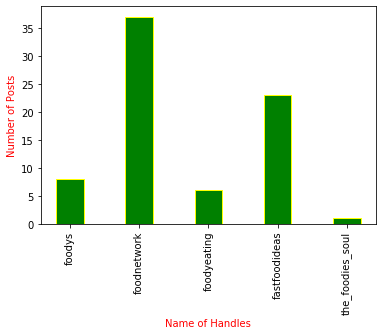

In [9]:
bot.posts_graph(posts_3days)

In [10]:
#Question---2...Part---1

In [11]:
content = bot.scrape_content(top_5_handles)

Fruit Loop Marshmallow Treats 🎉 AESTHETIC ON POINT! 5/5 drool 🤤🤤🤤🤤🤤! How many would you give it! @wendykou @tripactions

Pumpkin Spice Ice Cream Taco Roll 🎃🍨how many drools would you rate this?! 🤤🤤🤤🤤 I give it 4! @goodeatzco @tripactions

Vanila/Strawberry CHURRO Soft Serve! 🤤🤤🤤🤤🤤 5/5 drools! What would you rate this beauty? -
@candyandcocoa @tripactions

Burger Perfection 😭👌how many drools would you give this? I’m going with 4/5 🤤🤤🤤🤤 @jakesfoodbible @tripactions

Cookie Monster Rolled Ice Cream 🍪🍦wow.. 5 drools 🤤🤤🤤🤤🤤

@foodyfetish @tripactions

Cheesestakes and Fries what a beautiful site 😍How many drools would you give this?! I'm going with 4/5 🤤 🤤 🤤 🤤
-
@grubspot

Fried Shrimp Taco 🌮🍤 4/5 drools.. 🤤🤤🤤🤤 what would you rate it!?
-
@losangeles_eats

Dripping from drooling 🤤🤤🤤🤤🤤 5/5!! What would you rate this? @jakesfoodbible

Bacon Wrapped Jalapeño Sliders 🍔 drool meter is peaking at 5/5 🤤🤤🤤🤤🤤

How many drools would you give it? @twisted @tripactions

Copenhagen delight! Rolled ice-cre

Cookie Dough Energy Balls! Recipe available on Tipbuzz.com
👉Subscribe to our YouTube channel to watch more cool videos! Link to subscribe is in our profile. ™
///
by @tipbuzzfood
///
#healthyfood #foodie #foody #foodstylist #foodies #foodblogger #food52 #foods #foodphotography #tastytasty #yummyfood #happiness #healthy #instagram #lovefood #dinnerideas #yummi #tastygram #lunch

Evening Snacks be like this.

In frame:Thai Fried Fish

@the_foodies_soul
@the_foodies_soul
@the_foodies_soul
#fish #bangalorefoodblogger #americandish #thailand #chennaifoodies #nonveg #france_holidays #eveningsorted #exploreeverything #monzoczz19 #monoctz #igamo1 #cheekyfatcathitbybat
#buzzfeedunsolved #indiandose #bangkok #earthofficial #foodielifestyle #crazygirlfriendsbelike #crazygirl #delhifoodblog #bloggerstyle #delhifoodbloggers #yummy #instamood #instastyle #greatness #trackers #passionista #colombia

This one of My favourite Bundiya. It is also known as Boondi.

This is from Kaligodam. They serve fres

In [13]:
#Question---2...Part---2

In [14]:
word_dict = bot.word_list(content)

Fruit 1
Loop 1
Marshmallow 1
Treats 1
🎉 2
AESTHETIC 1
ON 1
POINT! 1
5/5 3
drool 2
🤤🤤🤤🤤🤤! 1
How 3
many 6
would 9
you 9
give 7
it! 1
@wendykou 1
@tripactions 7
Pumpkin 1
Spice 1
Ice 2
Cream 2
Taco 2
Roll 1
🎃🍨how 1
drools 6
rate 4
this?! 2
🤤🤤🤤🤤 3
I 2
it 4
4! 1
@goodeatzco 1
Vanila/Strawberry 1
CHURRO 1
Soft 1
Serve! 1
🤤🤤🤤🤤🤤 5
drools! 1
What 2
this 4
beauty? 1
- 5
@candyandcocoa 2
Burger 3
Perfection 1
😭👌how 1
this? 3
I’m 1
going 3
with 12
4/5 3
@jakesfoodbible 2
Cookie 3
Monster 1
Rolled 2
🍪🍦wow.. 1
5 2
 28
@foodyfetish 1
Cheesestakes 1
and 17
Fries 1
what 2
a 34
beautiful 2
site 1
😍How 1
I'm 2
🤤 7
@grubspot 1
Fried 2
Shrimp 1
🌮🍤 1
drools.. 1
it!? 1
@losangeles_eats 2
Dripping 1
from 7
drooling 1
5/5!! 1
Bacon 1
Wrapped 1
Jalapeño 1
Sliders 1
🍔 1
meter 1
is 22
peaking 1
at 13
it? 1
@twisted 1
Copenhagen 1
delight! 1
ice-cream 1
& 5
bubblewaffle! 1
Follow 10
for 11
the 36
best 1
food 2
guides 1
in 24
your 7
favorite 2
cities! 1
📷: 10
Steamed 2
WHOLE 2
Fish 2
(with 2
@jettila) 1
You 2
heard

In [15]:
#Question---2...Part---3

In [16]:
bot.create_csv(word_dict)

In [17]:
#Question---2...Part---4

In [18]:
hashtags = bot.content_hashtags(content)

#tastytasty
#foodgasm
#healthy
#healthyfood
#foodporn
#indianfoodie
#foodblogger
#healthybreakfast
#foodlover
#happiness
#foodphotography
#foodstylist
#food
#instagram
#tastygram
#yummyfood
#instapic
#yummy
#foodtalkindia
#indianfoodblogger
#kolkatabuzz
#lovefood
#lunch
#chocolate
#breakfast
#dinnerideas
#salad
#foodie
#healthylifestyle
#instagood
#chennaifoodies
#buzzfeedfoods
#buzzfood
#foodvideos
#foodvideo
#indianfood
#desifood
#foodiesofindia
#indianfoodbloggers
#foodmaniacindian
#indiankitchen
#indiancooking
#indiansnacks
#foodindia
#bangalorefoodies
#buzzfeedtasty
#sweet
#foods
#food52
#summer
#dessert
#yummi
#foody
#foodography
#photography
#indiantravelblogger
#indianlunch
#igkolkata
#mumbaifoodies
#mumbaifoodbloggers
#navratri
#homecooking
#HalloweenBakingChampionship
#foodstagram
#thailand
#nonveg
#instamood
#passionista
#foodwalk
#likeforlikes
#delhilifestylebloggers
#sweets
#indianstreetfood
#foodiesofindianapolis
#cravingfordessert
#punefoodbloggers
#durgapuja
#foodzpah
#

In [21]:
#Question---2...Part---5

#tastytasty 9
#foodgasm 8
#healthy 8
#healthyfood 7
#foodporn 7


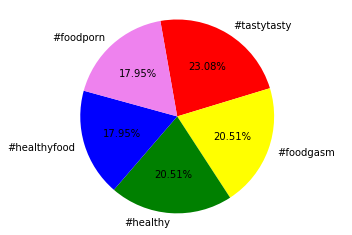

In [20]:
bot.hashtag_graph(hashtags)

In [22]:
#Question---3...Part---1

In [23]:
handles_likes = bot.posts_likes(top_5_handles)

foodys 254716
foodnetwork 104764
foodyeating 215076
fastfoodideas 256840
the_foodies_soul 2067


In [27]:
#Question---3...Part---2

In [24]:
average_likes = bot.avg_likes(handles_likes)

Average like for a handle is  166692.6


In [ ]:
#Question---3...Part---3

In [25]:
follower_like_dict = bot.follower_like(top_5_handles,handle_followers_dict,average_likes)

foodys 59.84914747265325
foodnetwork 57.0127288193957
foodyeating 17.604308769555455
fastfoodideas 3.21305204910116
the_foodies_soul 0.01699535552268067


In [ ]:
#Question---3...Part---4

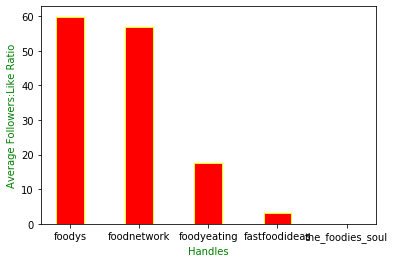

In [26]:
bot.follower_like_graph(follower_like_dict)